In [3]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Read csv files for each year and store in relevant dataframe:
#yearlist=["2012","2013","2014","2015","2016"]
#for year in yearlist:
#    fname="ObesityEduIncome_" + year + ".csv"
#    print(fname)
edui2012_df = pd.read_csv("ObesityEduIncome_2012.csv")
edui2013_df = pd.read_csv("ObesityEduIncome_2013.csv")
edui2014_df = pd.read_csv("ObesityEduIncome_2014.csv")
#edui2015_df = pd.read_csv("ObesityEduIncome_2015.csv")
edui2016_df = pd.read_csv("ObesityEduIncome_2016.csv")

#Add year as column to the dataframes
edui2012_df["Year"]="2012" 
edui2013_df["Year"]="2013"    
edui2014_df["Year"]="2014"    
#edui2015_df["Year"]="2015"    
edui2016_df["Year"]="2016"    


In [13]:
#Read 2015 csv with correct column names.
edui2015_df = pd.read_csv("ObesityEduIncome_2015.csv")
edui2015_df["Year"]="2015"   

In [5]:
edui2016_df.head(1)


,State,Date,BMI Category,BMI Over 25,Education_Level,INCOME2,Year
0,AL,1072016,Normal Weight,No,Graduated High School,"$25,000 to less than $35,000",2016


In [14]:
edui2015_df.head(1)

,State,Date,BMI Category,BMI Over 25,Education_Level,INCOME2,Year
0,AL,1292015,Obese,Yes,Graduated High School,"$15,000 to less than $20,000",2015


In [7]:
edui2014_df.head(1)

,State,Date,BMI Category,BMI Over 25,Education_Level,INCOME2,Year
0,AL,1172014,Overweight,Yes,Attended College or Technical School,"$50,000 to less than $75,000",2014


In [8]:
edui2013_df.head(1)

,State,Date,BMI Category,BMI Over 25,Education_Level,INCOME2,Year
0,AL,1092013,Obese,Yes,Graduated from College or Technical School,"$50,000 to less than $75,000",2013


In [22]:
#Concatenate multiple years to one dataframe
#edui_years_df = pd.concat([edui2012_df, edui2013_df, edui2014_df, edui2015_df, edui2016_df], ignore_index=True)
edui_years_df = pd.concat([edui2012_df, edui2013_df, edui2014_df, edui2015_df,edui2016_df], ignore_index=True)
edui_years_df.tail(5)

,State,Date,BMI Category,BMI Over 25,Education_Level,INCOME2,Year
2339200,VI,12312016,Overweight,Yes,Did not graduate High School,"Less than $10,000",2016
2339201,VI,12192016,Normal Weight,No,Graduated High School,Refused,2016
2339202,VI,12092016,Obese,Yes,Attended College or Technical School,"$20,000 to less than $25,000",2016
2339203,VI,12312016,Obese,Yes,Graduated High School,"$20,000 to less than $25,000",2016
2339204,VI,12312016,Overweight,Yes,Did not graduate High School,"Less than $10,000",2016


In [10]:
edui2012_df.head(1)

,State,Date,BMI Category,BMI Over 25,Education_Level,INCOME2,Year
0,AL,2162012,Overweight,Yes,Attended College or Technical School,"$35,000 to less than $50,000",2012


In [23]:
#Review unqiue values for BMI category
edui_years_df["BMI Category"].unique()

array(['Overweight', 'Obese', 'Normal Weight',
       "Don't know/Refused/Missing", 'Underweight'], dtype=object)

In [15]:
edui_years_df["Education_Level"].unique()

array(['Attended College or Technical School',
       'Graduated from College or Technical School',
       'Did not graduate High School', 'Graduated High School',
       'Don’t know/Not sure/Missing'], dtype=object)

In [17]:
edui_years_df["INCOME2"].unique()

array(['$35,000 to less than $50,000', '$75,000 or more', 'Refused',
       '$15,000 to less than $20,000', '$50,000 to less than $75,000',
       '$25,000 to less than $35,000', '$20,000 to less than $25,000',
       'Less than $10,000', '$10,000 to less than $15,000',
       'Don’t know/Not sure', 'Not asked or Missing'], dtype=object)

In [11]:
#cnt=0
#for row,col in edui2016_df.iterrows():
#    print(col)
#    cnt=cnt+1
#    if cnt > 2:
#        break

In [24]:
#separate values for BMI category into just overweight, obese and other. 
edui_years_df["BMI Category"] = edui_years_df["BMI Category"].replace(
    {"Normal Weight": "Other", "Don't know/Refused/Missing": "Other","Underweight":"Other"})


In [25]:
edui_years_df["BMI Category"].unique()

array(['Overweight', 'Obese', 'Other'], dtype=object)

In [26]:
#Rename INCOME2 to Income r ange in each category.
edui_years_df = edui_years_df.rename(columns={"INCOME2":"Income_range"})
edui_years_df.head(3)


,State,Date,BMI Category,BMI Over 25,Education_Level,Income_range,Year
0,AL,2162012,Overweight,Yes,Attended College or Technical School,"$35,000 to less than $50,000",2012
1,AL,1052012,Overweight,Yes,Graduated from College or Technical School,"$75,000 or more",2012
2,AL,1032012,Obese,Yes,Graduated from College or Technical School,Refused,2012


In [27]:
edui_years_df.tail(3)

,State,Date,BMI Category,BMI Over 25,Education_Level,Income_range,Year
2339202,VI,12092016,Obese,Yes,Attended College or Technical School,"$20,000 to less than $25,000",2016
2339203,VI,12312016,Obese,Yes,Graduated High School,"$20,000 to less than $25,000",2016
2339204,VI,12312016,Overweight,Yes,Did not graduate High School,"Less than $10,000",2016


In [29]:
#separate values for BMI category into just overweight, obese and other. 
#edui_years_df["BMI Category"] = edui_years_df["BMI Category"].replace(
#    {"Normal Weight": "Other", "Don't know/Refused/Missing": "Other","Underweight":"Other"})

#Replace certain missing or other categories into Other category for Income_range.
edui_years_df["Income_range"] = edui_years_df["Income_range"].replace(
    {"Don’t know/Not sure": "Other", "Not asked or Missing": "Other","Refused":"Other"})

#Create another column with education short form for ease of plotting.
edui_years_df["Education_short"] = edui_years_df["Education_Level"]
#Replace Education short form values. 
edui_years_df["Education_short"] = edui_years_df["Education_short"].replace(
    {"Attended College or Technical School": "ST College", "Did not graduate High School":"No-pass HS",
     "Don’t know/Not sure/Missing":"Unknown","Graduated High School":"Grad HS",
     "Graduated from College or Technical School":"Grad College"
    })

#Create another column with imcome short form.
edui_years_df["Income_short"] = edui_years_df["Income_range"]

In [37]:
edui_years_df.head(5)

,State,Date,BMI Category,BMI Over 25,Education_Level,Income_range,Year,Education_short,Income_short
0,AL,2162012,Overweight,Yes,Attended College or Technical School,"$35,000 to less than $50,000",2012,ST College,"$35,000 to less than $50,000"
1,AL,1052012,Overweight,Yes,Graduated from College or Technical School,"$75,000 or more",2012,Grad College,"$75,000 or more"
2,AL,1032012,Obese,Yes,Graduated from College or Technical School,Other,2012,Grad College,Other
3,AL,1192012,Other,No,Did not graduate High School,"$15,000 to less than $20,000",2012,No-pass HS,"$15,000 to less than $20,000"
4,AL,1062012,Obese,Yes,Graduated High School,Other,2012,Grad HS,Other


In [ ]:
# create short label version for income. 
#edui_years_df["Income_short"] = edui_years_df["Income_short"].replace(
#    {"Less than $10,000": "< 15K", "$10,000 to less than $15,000":"< 15K",
#     "$15,000 to less than $20,000":"15 to 20K","$20,000 to less than $25,000":"20 to 25K",
#     "$25,000 to less than $35,000":"25 to 35 K","$35,000 to less than $50,000":"35 to 50 K",
#     "$50,000 to less than $75,000":"50 to 75 K"  

In [34]:
#Group data frame by education, income range and bmi category to determine counts and % obese. 
edui_years_grp = edui_years_df.groupby(["Year","Education_Level","Income_range","BMI Category"])["Date"].count()

In [36]:
edui_years_grp.tail(10)

Year  Education_Level                             Income_range                  BMI Category
2016  Graduated from College or Technical School  $50,000 to less than $75,000  Overweight      10172
                                                  $75,000 or more               Obese           17516
                                                                                Other           31917
                                                                                Overweight      30158
                                                  Less than $10,000             Obese             623
                                                                                Other            1048
                                                                                Overweight        572
                                                  Other                         Obese            3389
                                                                                Other      

In [39]:
#unstack to get each count as a column in the dataframe.
edui_years_grp1 = edui_years_grp.unstack(level=3)

In [40]:
edui_years_grp1.head(10)

BMI Category                                                            Obese  \
Year Education_Level                      Income_range                          
2012 Attended College or Technical School $10,000 to less than $15,000   2324   
                                          $15,000 to less than $20,000   2894   
                                          $20,000 to less than $25,000   3651   
                                          $25,000 to less than $35,000   4348   
                                          $35,000 to less than $50,000   5840   
                                          $50,000 to less than $75,000   5864   
                                          $75,000 or more                6617   
                                          Less than $10,000              1926   
                                          Other                          3374   
     Did not graduate High School         $10,000 to less than $15,000   2109   

BMI Category                                                            Other  \
Year Education_Level                      Income_range                          
2012 Attended College or Technical School $10,000 to less than $15,000   2459   
                                          $15,000 to less than $20,000   3246   
                                          $20,000 to less than $25,000   4287   
                                          $25,000 to less than $35,000   5387   
                                          $35,000 to less than $50,000   6387   
                                          $50,000 to less than $75,000   6495   
                                          $75,000 or more                8759   
                                          Less than $10,000              2401   
                                          Other                          8314   
     Did not graduate High School         $10,000 to less than $15,000   2040   

BMI Category                                                            Overweight  
Year Education_Level                      Income_range                              
2012 Attended College or Technical School $10,000 to less than $15,000        2100  
                                          $15,000 to less than $20,000        2931  
                                          $20,000 to less than $25,000        3792  
                                          $25,000 to less than $35,000        5043  
                                          $35,000 to less than $50,000        6876  
                                          $50,000 to less than $75,000        7007  
                                          $75,000 or more                     9037  
                                          Less than $10,000                   1665  
                                          Other                               4790  
     Did not graduate High School         $10,000 to less than $15,000        1877

In [41]:
#edui2016_inc_grp1
#Determine total counts for all categories.
edui_years_grp1["Total_cnt"] = edui_years_grp1["Obese"] + edui_years_grp1["Overweight"] + edui_years_grp1["Other"] 

#Determine percent obese for each education level
edui_years_grp1["percent_obese"] = (edui_years_grp1["Obese"] / edui_years_grp1["Total_cnt"]) * 100

#Determine percent overweight for each education level
edui_years_grp1["percent_overweight"] = (edui_years_grp1["Overweight"] / edui_years_grp1["Total_cnt"]) * 100


In [42]:
edui_years_grp1.head(15)

BMI Category                                                            Obese  \
Year Education_Level                      Income_range                          
2012 Attended College or Technical School $10,000 to less than $15,000   2324   
                                          $15,000 to less than $20,000   2894   
                                          $20,000 to less than $25,000   3651   
                                          $25,000 to less than $35,000   4348   
                                          $35,000 to less than $50,000   5840   
                                          $50,000 to less than $75,000   5864   
                                          $75,000 or more                6617   
                                          Less than $10,000              1926   
                                          Other                          3374   
     Did not graduate High School         $10,000 to less than $15,000   2109   
                                          $15,000 to less than $20,000   2062   
                                          $20,000 to less than $25,000   1605   
                                          $25,000 to less than $35,000   1286   
                                          $35,000 to less than $50,000    808   
                                          $50,000 to less than $75,000    438   

BMI Category                                                            Other  \
Year Education_Level                      Income_range                          
2012 Attended College or Technical School $10,000 to less than $15,000   2459   
                                          $15,000 to less than $20,000   3246   
                                          $20,000 to less than $25,000   4287   
                                          $25,000 to less than $35,000   5387   
                                          $35,000 to less than $50,000   6387   
                                          $50,000 to less than $75,000   6495   
                                          $75,000 or more                8759   
                                          Less than $10,000              2401   
                                          Other                          8314   
     Did not graduate High School         $10,000 to less than $15,000   2040   
                                          $15,000 to less than $20,000   2129   
                                          $20,000 to less than $25,000   1692   
                                          $25,000 to less than $35,000   1275   
                                          $35,000 to less than $50,000    724   
                                          $50,000 to less than $75,000    375   

BMI Category                                                            Overweight  \
Year Education_Level                      Income_range                               
2012 Attended College or Technical School $10,000 to less than $15,000        2100   
                                          $15,000 to less than $20,000        2931   
                                          $20,000 to less than $25,000        3792   
                                          $25,000 to less than $35,000        5043   
                                          $35,000 to less than $50,000        6876   
                                          $50,000 to less than $75,000        7007   
                                          $75,000 or more                     9037   
                                          Less than $10,000                   1665   
                                          Other                               4790   
     Did not graduate High School         $10,000 to less than $15,000        1877   
                                          $15,000 to less than $20,000        2042   
                                          $20,000 to less than $25,000        1671   
                                        

In [45]:
#reset index to make the index to columns in the dataframe.
edui_years_grp1.reset_index(level=None, drop=False, inplace=True)


In [46]:
edui_years_grp1.head(15)

BMI Category,Year,Education_Level,Income_range,Obese,Other,Overweight,Total_cnt,percent_obese,percent_overweight
0,2012,Attended College or Technical School,"$10,000 to less than $15,000",2324,2459,2100,6883,33.764347,30.509952
1,2012,Attended College or Technical School,"$15,000 to less than $20,000",2894,3246,2931,9071,31.903869,32.311763
2,2012,Attended College or Technical School,"$20,000 to less than $25,000",3651,4287,3792,11730,31.125320,32.327366
3,2012,Attended College or Technical School,"$25,000 to less than $35,000",4348,5387,5043,14778,29.422114,34.125051
4,2012,Attended College or Technical School,"$35,000 to less than $50,000",5840,6387,6876,19103,30.571114,35.994346
5,2012,Attended College or Technical School,"$50,000 to less than $75,000",5864,6495,7007,19366,30.279872,36.181968
6,2012,Attended College or Technical School,"$75,000 or more",6617,8759,9037,24413,27.104412,37.017163
7,2012,Attended College or Technical School,"Less than $10,000",1926,2401,1665,5992,32.142857,27.787049
8,2012,Attended College or Technical School,Other,3374,8314,4790,16478,20.475786,29.069062
9,2012,Did not graduate High School,"$10,000 to less than $15,000",2109,2040,1877,6026,34.998341,31.148357


In [57]:
edui_years_grp2016 = edui_years_grp1.loc[edui_years_grp1["Year"]== "2016"]

In [58]:
edui_years_grp2016.head(5)

BMI Category,Year,Education_Level,Income_range,Obese,Other,Overweight,Total_cnt,percent_obese,percent_overweight
180,2016,Attended College or Technical School,"$10,000 to less than $15,000",2111,2087,1687,5885,35.870858,28.666100
181,2016,Attended College or Technical School,"$15,000 to less than $20,000",2819,3022,2565,8406,33.535570,30.513919
182,2016,Attended College or Technical School,"$20,000 to less than $25,000",3753,4186,3558,11497,32.643298,30.947204
183,2016,Attended College or Technical School,"$25,000 to less than $35,000",4531,4942,4567,14040,32.272080,32.528490
184,2016,Attended College or Technical School,"$35,000 to less than $50,000",6107,6200,6619,18926,32.267780,34.973053


In [59]:
edui_years_grp2016.tail(5)

BMI Category,Year,Education_Level,Income_range,Obese,Other,Overweight,Total_cnt,percent_obese,percent_overweight
220,2016,Graduated from College or Technical School,"$35,000 to less than $50,000",5058,7299,6251,18608,27.181857,33.593078
221,2016,Graduated from College or Technical School,"$50,000 to less than $75,000",7278,10787,10172,28237,25.774693,36.023657
222,2016,Graduated from College or Technical School,"$75,000 or more",17516,31917,30158,79591,22.007513,37.891219
223,2016,Graduated from College or Technical School,"Less than $10,000",623,1048,572,2243,27.775301,25.501560
224,2016,Graduated from College or Technical School,Other,3389,13296,6323,23008,14.729659,27.481745


In [ ]:
#Add factore plot for multiple years. 
#sns.set()
#
#sns.factorplot(x="Age Group", y='Total% by Sex by Age Group', hue='Year', data=df_combined, ci=None, kind='bar', size= 6)
#plt.title("Obesity % by Age Group by Year",size=20)

#plt.show()

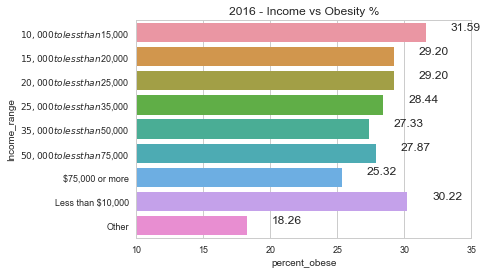

In [64]:
import seaborn as sns
sns.set_style("whitegrid")
#Create plot of income vs obesity %
#ax = sns.barplot(y=edui2016_inc_grp1["Income_range"], x=edui2016_inc_grp1["percent_obese"], 
#                 data=edui2016_inc_grp1,errwidth=None)

ax = sns.barplot(y=edui_years_grp1["Income_range"], x=edui_years_grp1["percent_obese"], 
                 data=edui_years_grp1,errwidth=None,ci=None)
sns.set(font_scale=1)
plt.title("2016 - Income vs Obesity %")
for p in ax.patches:
    width = p.get_width()
    plt.text(3+p.get_width(), p.get_y()+0.2*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.xlim(10,35)
plt.show()

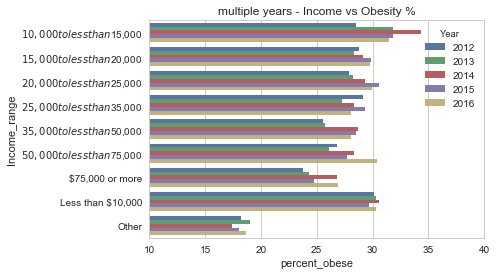

In [72]:
#Create plot of income vs obesity % for multiple years
#import seaborn as sns
sns.set_style("whitegrid")

ax = sns.barplot(y=edui_years_grp1["Income_range"], x=edui_years_grp1["percent_obese"], 
                 data=edui_years_grp1,errwidth=None,ci=None,hue=edui_years_grp1["Year"])

plt.title("multiple years - Income vs Obesity %")
# for p in ax.patches:
#     width = p.get_width()
#     plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
#              '{:1.2f}'.format(width),
#              ha='center', va='center')

plt.xlim(10,40)
plt.savefig("Income_vs_obesity.png",bbox_inches='tight')
plt.show()


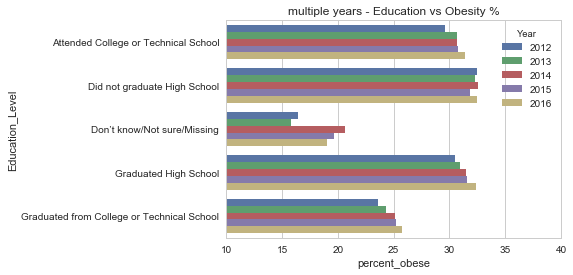

In [75]:
#Create plot of Education vs obesity % for multiple years
#import seaborn as sns
sns.set_style("whitegrid")

ax = sns.barplot(y=edui_years_grp1["Education_Level"], x=edui_years_grp1["percent_obese"], 
                 data=edui_years_grp1,errwidth=None,ci=None,hue=edui_years_grp1["Year"])

plt.title("multiple years - Education vs Obesity %")
# for p in ax.patches:
#     width = p.get_width()
#     plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
#              '{:1.2f}'.format(width),
#              ha='center', va='center')

plt.xlim(10,40)
plt.savefig("Education_vs_obesity.png",bbox_inches='tight')
plt.show()

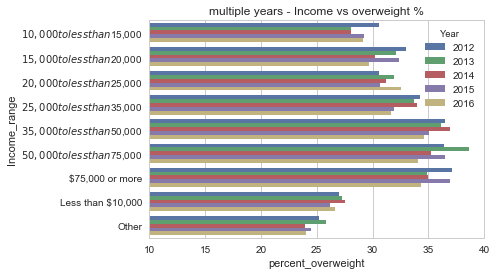

In [74]:
#Create plot of income vs overweight % for multiple years
#import seaborn as sns
sns.set_style("whitegrid")

ax = sns.barplot(y=edui_years_grp1["Income_range"], x=edui_years_grp1["percent_overweight"], 
                 data=edui_years_grp1,errwidth=None,ci=None,hue=edui_years_grp1["Year"])

plt.title("multiple years - Income vs overweight %")
# for p in ax.patches:
#     width = p.get_width()
#     plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
#              '{:1.2f}'.format(width),
#              ha='center', va='center')

plt.xlim(10,40)
plt.savefig("Income_vs_overweight_percent.png",bbox_inches='tight')
plt.show()

In [43]:
#edui2016_inc_grp.head(5)

In [44]:
#edui2016_inc_grp1.head(5)

In [47]:
#edui2016_inc_grp1

In [48]:
#edui2016_inc_grp1

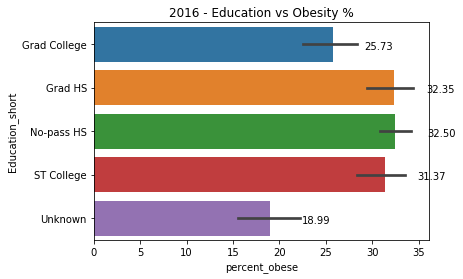

In [37]:
import seaborn as sns
#sns.set_style("whitegrid")
ax = sns.barplot(x=edui2016_inc_grp1["percent_obese"],y=edui2016_inc_grp1["Education_short"], data=edui2016_inc_grp1)
##bar2012 = sns.barplot(x=yes, y=myColumns)
plt.title("2016 - Education vs Obesity %")
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.show()

In [51]:
# edui2016_inc_grp2 = edui2016_inc_grp1.unstack(level=1)

In [60]:
#edui2016_inc_grp2

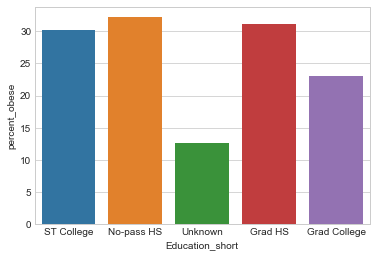

In [44]:
# #Create  plots of education vs obesity percent
# sns.set_style("whitegrid")
# ax = sns.barplot(x=edui2016_grp_cnt["Education_short"], y=edui2016_grp_cnt["percent_obese"], data=edui2016_grp_cnt)

In [ ]:
#Create  plots of education vs overwieght percent

In [ ]:
#ax = sns.barplot(x=edui2016_grp_cnt["Education_level"], y=edui2016_grp_cnt["percent_obese"], data=edui2016_grp_cnt)